# [PREDICT FISH SPECIES]

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.9 kB/s eta 0:00:0000:0100:19
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.6 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
fish_data = pd.read_csv('Fish.csv')

X = fish_data.drop('Species', axis=1)  # Drop the 'species' column
y = fish_data['Species']  # Select only the 'species' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
FishModel = DecisionTreeClassifier(criterion='gini')

# Train the classifier on the training data
FishModel.fit(X_train, y_train)

# Predict the species of fish on the testing data
y_pred = FishModel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Matplotlib is building the font cache; this may take a moment.


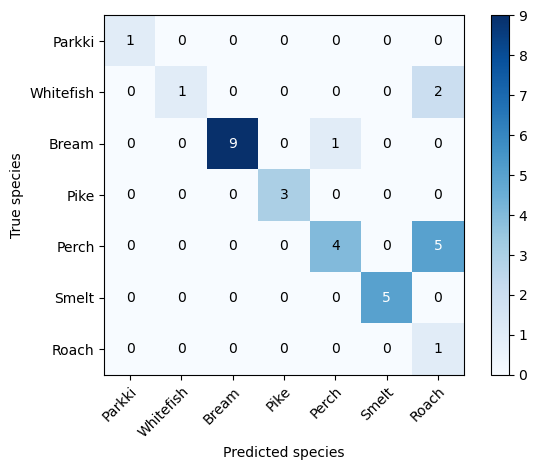

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=list(set(y)))

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=list(set(y)),
       yticklabels=list(set(y)),
       xlabel='Predicted species',
       ylabel='True species')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()